In [1]:
import numpy as np
import tensorflow as tf
import keras
import scipy.io
import sklearn
import matplotlib

Using TensorFlow backend.


In [2]:
from matplotlib import pyplot as plt

from keras.layers import AveragePooling1D
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import Activation,Dense,Dropout
from keras.layers import Flatten
from keras.utils import np_utils

from sklearn import preprocessing,metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
pathAddress="C:\\Users\\HP\\Desktop\\KaunsiElectivesLenaHai\\Neural Network and fuzzy logic BITS F312"



In [4]:
arr=scipy.io.loadmat(pathAddress+"\\data_for_cnn.mat")
df=arr['ecg_in_window']


In [5]:
df

array([[ -55,  -42,  -59, ...,  -35,   -1,  -34],
       [   3,  -27,    0, ...,  118, -111,  121],
       [-111,  121, -109, ...,  -23,  -52,  -29],
       ...,
       [  -4,   29,   -1, ...,  -50,  -64,  -58],
       [ -63,  -54,  -57, ...,  -83, -210,  -84],
       [-213,  -91, -225, ...,   10,  -35,    4]], dtype=int16)

In [6]:
label=scipy.io.loadmat(pathAddress+"\\class_label.mat")
labels=label['label']


In [7]:
labels

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [8]:
normal=preprocessing.StandardScaler()
df=normal.fit_transform(df)

X=np.expand_dims(df,axis=2)
Y=labels


In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


In [10]:
num_epoch=30

#available_activations=['sigmoid','tanh','selu','softsign','relu','linear']
available_activations=['sigmoid','tanh']

models=[]
for i in range(len(available_activations)):
    model=Sequential()
    model.add(Conv1D(50,10,activation='relu',input_shape=(1000,1)))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Conv1D(50,10,activation='relu'))
    model.add(AveragePooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(100,activation=available_activations[i]))
    model.add(Dense(20,activation=available_activations[i]))
    model.add(Dense(1,activation=available_activations[i]))
    models.append(model)
print(str(len(available_activations))+" "+"Number of models according to activation function in available_activations : ")
for i in range(len(models)):
    print("Model "+str(i)+" : ",models[i])
    
available_optimizer=['SGD','RMSprop','Adagrad','Adadelta','adam','Adamax','Nadam']
learning_rate=0.1
print("Started compiling.........")

for i in range(len(models)):
    print("Model "+str(i)+" : ",i)
    models[i].compile(loss='mse',optimizer=available_optimizer[4],metrics=['mean_squared_error','acc'])

    
    
    

2 Number of models according to activation function in available_activations : 
Model 0 :  <keras.engine.sequential.Sequential object at 0x0000025906CF8198>
Model 1 :  <keras.engine.sequential.Sequential object at 0x0000025906E395F8>
Started compiling.........
Model 0 :  0
Model 1 :  1


In [11]:
histories=[]
for h in range(len(models)):
    print("Started fitting.....")
    print("Model "+str(h)+" : ",h)#to remove h=1,3,6,7,8
    histories.append(models[h].fit(x_train,y_train,batch_size=100,epochs=num_epoch))

Started fitting.....
Model 0 :  0
Epoch 1/30
800/800 [==============================] - 3s 4ms/step - loss: 0.2495 - mean_squared_error: 0.2495 - acc: 0.4975
Epoch 2/30
800/800 [==============================] - 3s 3ms/step - loss: 0.2463 - mean_squared_error: 0.2463 - acc: 0.5537
Epoch 3/30
800/800 [==============================] - 3s 3ms/step - loss: 0.2408 - mean_squared_error: 0.2408 - acc: 0.5825
Epoch 4/30
800/800 [==============================] - 3s 4ms/step - loss: 0.2386 - mean_squared_error: 0.2386 - acc: 0.5800
Epoch 5/30
800/800 [==============================] - 3s 3ms/step - loss: 0.2334 - mean_squared_error: 0.2334 - acc: 0.6100
Epoch 6/30
800/800 [==============================] - 3s 4ms/step - loss: 0.2287 - mean_squared_error: 0.2287 - acc: 0.6150
Epoch 7/30
800/800 [==============================] - 3s 3ms/step - loss: 0.2210 - mean_squared_error: 0.2210 - acc: 0.6413
Epoch 8/30
800/800 [==============================] - 3s 3ms/step - loss: 0.2123 - mean_squared_er

dict_keys(['loss', 'mean_squared_error', 'acc'])


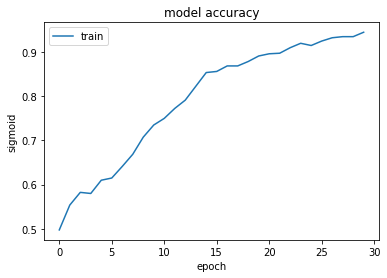

dict_keys(['loss', 'mean_squared_error', 'acc'])


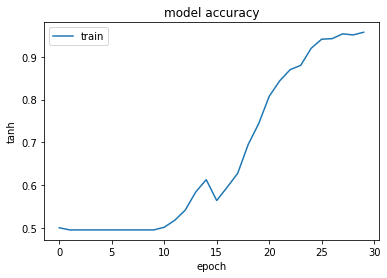

In [12]:
for history in histories:
    print(history.history.keys())
    plt.plot(history.history['acc'])
    plt.title('model accuracy')
    plt.ylabel(available_activations[histories.index(history)])
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


In [13]:
pre_classes=[]
for m in range(len(models)):
    pre_cls=models[m].predict(x_test)
    #for i in range(pre_cls):
     #   if pre_cls[i]>=0.5:
      #      pre_cls[i]=1
      #  else:
       #     pre_cls[i]=0
            
    pre_classes.append(pre_cls)

In [14]:
pre_classes

[array([[0.90439963],
        [0.86027145],
        [0.5110382 ],
        [0.1117624 ],
        [0.12512437],
        [0.9085848 ],
        [0.13302767],
        [0.12119031],
        [0.136112  ],
        [0.5892493 ],
        [0.90502965],
        [0.2464943 ],
        [0.85071397],
        [0.10346183],
        [0.4742267 ],
        [0.19423905],
        [0.16059282],
        [0.42449403],
        [0.8930381 ],
        [0.67332006],
        [0.5986308 ],
        [0.903401  ],
        [0.9247646 ],
        [0.5884159 ],
        [0.86116236],
        [0.16793194],
        [0.10421017],
        [0.67061126],
        [0.92140347],
        [0.12117523],
        [0.8599657 ],
        [0.7798533 ],
        [0.29177532],
        [0.92607737],
        [0.1531902 ],
        [0.11578605],
        [0.43951645],
        [0.9044565 ],
        [0.76532197],
        [0.90462935],
        [0.92448455],
        [0.93081254],
        [0.1813634 ],
        [0.15902096],
        [0.1105642 ],
        [0

In [15]:
confusion_matrices=[]
predicted_values=[]
for p in pre_classes:
    converted_p_to_binary=p
    converted_p_to_binary=converted_p_to_binary.ravel()
    
    for i in range(len(converted_p_to_binary)):
        if converted_p_to_binary[i]>=0.5:
            converted_p_to_binary[i]=1
        else:converted_p_to_binary[i]=0
    
    converted_p_to_binary=np.reshape(converted_p_to_binary,(-1,1))
    
    predicted_values.append(converted_p_to_binary)
    
    cm1 = confusion_matrix(y_test,converted_p_to_binary)
    confusion_matrices.append(cm1)

In [16]:
print("Predicted Values : ")
print(predicted_values)

Predicted Values : 
[array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
    

In [17]:
print("Confusion Matrices :")
for cm1 in confusion_matrices:
    print(cm1)

Confusion Matrices :
[[74 22]
 [19 85]]
[[69 27]
 [13 91]]


In [18]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

print("For 2D confusion matrix")
for i,cm1 in enumerate(confusion_matrices):
    tn, fp, fn, tp = cm1.ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    accuracy*=100
    recall=tp/(tp+fn)
    recall*=100
    precision=tp/(tp+fp)
    precision*=100
    f_measure=2*(recall*precision)/(recall+precision)


    print("accuracy : ",accuracy)
    print("recall : ",recall)
    print("precision : ",precision)
    print("f_measure : ",f_measure)
    
    actual=y_test
    predicted=predicted_values[i]
    results = confusion_matrix(actual, predicted) 
    print('Confusion Matrix :')
    print(results) 
    print('Accuracy Score :',100*accuracy_score(actual, predicted))  
    print('Report : ')
    print(classification_report(actual, predicted) )

For 2D confusion matrix
accuracy :  79.5
recall :  81.73076923076923
precision :  79.43925233644859
f_measure :  80.56872037914692
Confusion Matrix :
[[74 22]
 [19 85]]
Accuracy Score : 79.5
Report : 
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        96
           1       0.79      0.82      0.81       104

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200

accuracy :  80.0
recall :  87.5
precision :  77.11864406779661
f_measure :  81.98198198198199
Confusion Matrix :
[[69 27]
 [13 91]]
Accuracy Score : 80.0
Report : 
              precision    recall  f1-score   support

           0       0.84      0.72      0.78        96
           1       0.77      0.88      0.82       104

    accuracy                           0.80       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.80      0.80   